# PRML Bonus Project | B20AI064 | SAKSHAM SINGH

# G Drive Linkage

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Bonus_Project/datasets

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Bonus_Project/datasets


#Import Statements

In [1]:
!pip install contractions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk
from sklearn.model_selection import RepeatedStratifiedKFold
nltk.download('stopwords')
nltk.download('wordnet')
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, SnowballStemmer
from bs4 import BeautifulSoup
import re, string, unicodedata
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from tqdm import tqdm
import time
from sklearn.model_selection import cross_val_score
import joblib
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

     |████████████████████████████████| 106 kB 15.5 MB/s 
     |████████████████████████████████| 287 kB 39.3 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Dataset Import

In [3]:
data = pd.read_csv("mbti_1.csv")

# Data Exploration

In [176]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [177]:
personality_type = np.unique(data['type'])
personality_type

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [178]:
print(np.array(data.loc[[0]]['posts'])[0])

'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

## Visualization | Distrbution of Personality Types

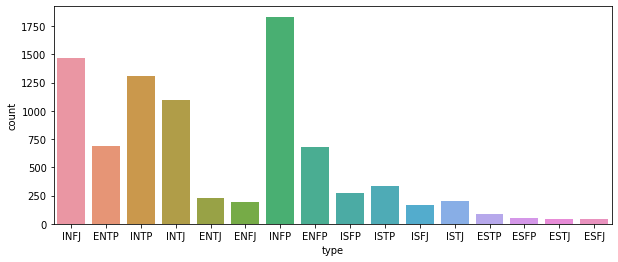

In [179]:
plt.figure(figsize=(10,4))
sns.countplot(x="type", data=data)

In [180]:
px.pie(data,names='type',title='Personality type',hole=0.3)

# Data Preprocessing

In [5]:
class preprocessing():
  def __init__(self,df):
    self.df = df

  # Web Based Data #
  def _html_remover(self,data):
    return re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',data)

  def _url_remover(self,data):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', data)

  # Noise Removal #

  def _remove_punc(self,data):
    trans = str.maketrans('','', string.punctuation)
    return data.translate(trans)
  def _white_space(self,data):
    return ' '.join(data.split())
  def _remove_num(self,data):
    return re.sub('[0-9]+','', data)
  # Text Normalization #
  def _text_lower(self,data):
    return data.lower()
  def _contraction_replace(self,data):
    return contractions.fix(data)

  # # 
  def _stopword(self,data):
    data = data.split(" ")
    stop_words = set(stopwords.words('english'))
    clean = []
    for i in data:
      if i not in stop_words:
        clean.append(i)
    return clean

  def _lemmatization(self,data):
    lemma = WordNetLemmatizer()
    lemmas = []
    for i in data:
      lem = lemma.lemmatize(i, pos='v')
      lemmas.append(lem)
    return lemmas 
   
  def fit_transform(self):
    self.df['preprocessed_posts'] = self.df['posts'].apply(self.entire_process)
    return self.df

  def entire_process(self,text):
    new_text = text
    new_text = self._html_remover(new_text)
    new_text = self._url_remover(new_text)
    
    new_text = self._white_space(new_text)
    new_text = self._remove_num(new_text)
    new_text = self._text_lower(new_text)
    new_text = self._contraction_replace(new_text)

    new_text = self._remove_punc(new_text)
    new_text = self._stopword(new_text)

    new_text = self._lemmatization(new_text)
    s = str()
    for i,text in enumerate(new_text):
      if(i!=0):
        s+=" "
      s+=str(text)
    return s

In [6]:
proc = preprocessing(data)
data_proc = proc.fit_transform()

In [7]:
data_proc['ie'] = data_proc.type
data_proc['ns'] = data_proc.type
data_proc['ft'] = data_proc.type
data_proc['pj'] = data_proc.type

for i, t in enumerate(data_proc.type):
    if 'I' in t:
        data_proc.ie[i] = 'I'
    elif 'E' in t:
        data_proc.ie[i] = 'E'
        
    if 'N' in t:
        data_proc.ns[i] = 'N'
    elif 'S' in t:
        data_proc.ns[i] = 'S'
        
    if 'F' in t:
        data_proc.ft[i] = 'F'
    elif 'T' in t:
        data_proc.ft[i] = 'T'
        
    if 'P' in t:
        data_proc.pj[i] = 'P'
    elif 'J' in t:
        data_proc.pj[i] = 'J'


posts = data_proc.posts.values
yIE = data_proc.ie.values
yNS = data_proc.ns.values
yFT = data_proc.ft.values
yPJ = data_proc.pj.values
y = data_proc.type

In [8]:
print ("Introversion (I) |  Extroversion (E):\t", data_proc['ie'].value_counts()['I'], " | ", data_proc['ie'].value_counts()['E'])
print ("Intuition (N) | Sensing (S):\t\t", data_proc['ns'].value_counts()['N'], " | ", data_proc['ns'].value_counts()['S'])
print ("Thinking (T) | Feeling (F):\t\t", data_proc['ft'].value_counts()['F'], " | ", data_proc['ft'].value_counts()['T'])
print ("Judging (J) | Perceiving (P):\t\t", data_proc['pj'].value_counts()['P'], " | ", data_proc['pj'].value_counts()['J'])

Introversion (I) |  Extroversion (E):	 6676  |  1999
Intuition (N) | Sensing (S):		 7478  |  1197
Thinking (T) | Feeling (F):		 4694  |  3981
Judging (J) | Perceiving (P):		 5241  |  3434


In [9]:
df = data_proc.drop(columns=['posts'])

In [52]:
classes = ['ie','ns','ft','pj']
types = ['']
frac = [3.4,6.2,0.85,0.7]
datasets=dict()
#print(data_proc[data_proc['ie']=='E'].sample(frac=3, replace=True))
datasets['ie'] = pd.concat([data_proc[data_proc['ie']=='E'].sample(frac=frac[0], replace=True),data_proc[data_proc['ie']=='I'].sample(frac=1.0, replace=True)])  
datasets['ns'] = pd.concat([data_proc[data_proc['ns']=='S'].sample(frac=frac[1], replace=True),data_proc[data_proc['ns']=='N'].sample(frac=1.0, replace=True)])  
datasets['ft'] = pd.concat([data_proc[data_proc['ft']=='F'].sample(frac=frac[2], replace=True),data_proc[data_proc['ft']=='T'].sample(frac=1.0, replace=True)])  
datasets['pj'] = pd.concat([data_proc[data_proc['pj']=='P'].sample(frac=frac[3], replace=True),data_proc[data_proc['pj']=='J'].sample(frac=1.0, replace=True)])  

In [53]:
print ("Introversion (I) |  Extroversion (E):\t", datasets['ie']['ie'].value_counts()['I'], " | ", datasets['ie']['ie'].value_counts()['E'])
print ("Intuition (N) | Sensing (S):\t\t", datasets['ns']['ns'].value_counts()['N'], " | ", datasets['ns']['ns'].value_counts()['S'])
print ("Thinking (T) | Feeling (F):\t\t", datasets['ft']['ft'].value_counts()['F'], " | ", datasets['ft']['ft'].value_counts()['T'])
print ("Judging (J) | Perceiving (P):\t\t", datasets['pj']['pj'].value_counts()['P'], " | ", datasets['pj']['pj'].value_counts()['J'])

Introversion (I) |  Extroversion (E):	 6676  |  6797
Intuition (N) | Sensing (S):		 7478  |  7421
Thinking (T) | Feeling (F):		 3990  |  3981
Judging (J) | Perceiving (P):		 3669  |  3434


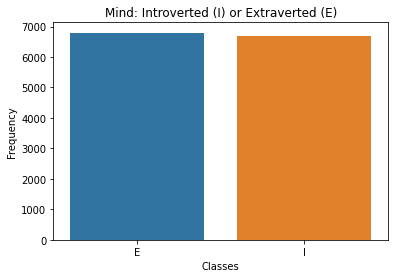

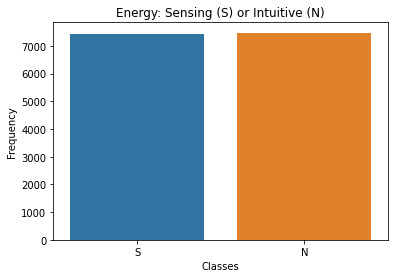

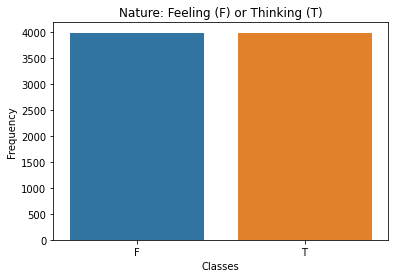

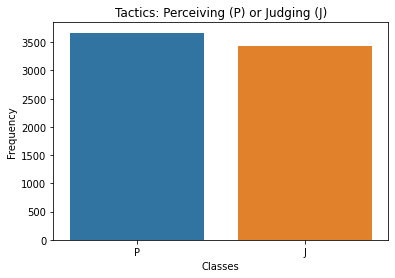

In [55]:
titles = ["Mind: Introverted (I) or Extraverted (E)", "Energy: Sensing (S) or Intuitive (N)","Nature: Feeling (F) or Thinking (T)","Tactics: Perceiving (P) or Judging (J)"]
for j,i in enumerate(classes):
  sns.countplot(x=i, data=datasets[i])
  plt.xlabel("Classes")
  plt.ylabel("Frequency")
  plt.title(titles[j])
  plt.show()

# Data Label Encoding | ['type']

In [68]:
class_labels = dict()
for i in classes:
  le = LabelEncoder()
  datasets[i][i] = le.fit_transform(datasets[i][i])
  le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  class_labels[i] = le_name_mapping

## Cleaning Targets

# Data Vectorization

In [13]:
vectorizer = TfidfVectorizer(stop_words='english',
                             analyzer = "word",
                             max_features = 500)
data_tfidf = vectorizer.fit_transform(data_proc['preprocessed_posts'])

# Splits | TV

In [69]:
X_train = dict()
X_valid = dict()
y_train = dict()
y_valid = dict()
for i in classes:
  X_train[i], X_valid[i], y_train[i],y_valid[i] = train_test_split(datasets[i]['preprocessed_posts'], datasets[i][i], test_size=0.30, random_state=42)

# Training Multiple Models

In [65]:
classifiers = [
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
clf_names = [
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [70]:
def train_diff_models(vectorizer,datasets):
  models_all = dict()
  for j,model in enumerate(classifiers):
    print(f"Training {model}")
    models_t = dict()
    for i in tqdm(classes):  
      X = vectorizer.transform(datasets[i]['preprocessed_posts']).toarray()
      y = datasets[i][i]
      print(f"\n\nTraining for class {i}")
      clf = model
      clf.fit(X,y)
      y_pred = clf.predict(X)
      print(clf.score(X,y))
      print(metrics.log_loss(y_pred,y))  
      print("\n")
      print(metrics.classification_report(y_pred,y))  
      models_t[i] = clf
    models_all[clf_names[j]] = models_t
  return models_all

In [71]:
%%time
models_all = train_diff_models(vectorizer,datasets)

Training RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)


 25%|██▌       | 1/4 [00:06<00:18,  6.15s/it]



Training for class ie
0.6855191865211905
10.861907603103942


              precision    recall  f1-score   support

           0       0.69      0.69      0.69      6776
           1       0.68      0.68      0.68      6697

    accuracy                           0.69     13473
   macro avg       0.69      0.69      0.69     13473
weighted avg       0.69      0.69      0.69     13473



 50%|█████     | 2/4 [00:12<00:12,  6.47s/it]



Training for class ns
0.6804483522384053
11.037046452074236


              precision    recall  f1-score   support

           0       0.67      0.69      0.68      7321
           1       0.69      0.68      0.68      7578

    accuracy                           0.68     14899
   macro avg       0.68      0.68      0.68     14899
weighted avg       0.68      0.68      0.68     14899



 75%|███████▌  | 3/4 [00:16<00:05,  5.16s/it]



Training for class ft
0.6762012294567809
11.183735614669663


              precision    recall  f1-score   support

           0       0.66      0.68      0.67      3847
           1       0.69      0.67      0.68      4124

    accuracy                           0.68      7971
   macro avg       0.68      0.68      0.68      7971
weighted avg       0.68      0.68      0.68      7971



100%|██████████| 4/4 [00:19<00:00,  4.91s/it]




Training for class pj
0.6194565676474729
13.143570485645174


              precision    recall  f1-score   support

           0       0.38      0.69      0.49      1903
           1       0.84      0.59      0.70      5200

    accuracy                           0.62      7103
   macro avg       0.61      0.64      0.59      7103
weighted avg       0.72      0.62      0.64      7103

Training AdaBoostClassifier()


  0%|          | 0/4 [00:00<?, ?it/s]



Training for class ie


 25%|██▌       | 1/4 [00:24<01:14, 24.71s/it]

0.8053885548875529
6.7217044517417355


              precision    recall  f1-score   support

           0       0.77      0.83      0.80      6307
           1       0.84      0.78      0.81      7166

    accuracy                           0.81     13473
   macro avg       0.81      0.81      0.81     13473
weighted avg       0.81      0.81      0.81     13473



Training for class ns


 50%|█████     | 2/4 [00:54<00:55, 27.65s/it]

0.809584535874891
6.576800054392326


              precision    recall  f1-score   support

           0       0.83      0.80      0.81      7731
           1       0.79      0.82      0.81      7168

    accuracy                           0.81     14899
   macro avg       0.81      0.81      0.81     14899
weighted avg       0.81      0.81      0.81     14899



Training for class ft


 75%|███████▌  | 3/4 [01:10<00:22, 22.17s/it]

0.8366578848325179
5.641700590909462


              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3960
           1       0.84      0.83      0.84      4011

    accuracy                           0.84      7971
   macro avg       0.84      0.84      0.84      7971
weighted avg       0.84      0.84      0.84      7971



Training for class pj


100%|██████████| 4/4 [01:24<00:00, 21.01s/it]


0.7962832605941151
7.036197717896572


              precision    recall  f1-score   support

           0       0.76      0.81      0.78      3245
           1       0.83      0.79      0.81      3858

    accuracy                           0.80      7103
   macro avg       0.80      0.80      0.80      7103
weighted avg       0.80      0.80      0.80      7103

Training GaussianNB()


  0%|          | 0/4 [00:00<?, ?it/s]



Training for class ie


 25%|██▌       | 1/4 [00:06<00:18,  6.09s/it]

0.7647888369331255
8.123992889816632


              precision    recall  f1-score   support

           0       0.75      0.78      0.76      6564
           1       0.78      0.75      0.77      6909

    accuracy                           0.76     13473
   macro avg       0.76      0.77      0.76     13473
weighted avg       0.77      0.76      0.76     13473



Training for class ns


 50%|█████     | 2/4 [00:12<00:12,  6.45s/it]

0.7940130210081213
7.114617743430595


              precision    recall  f1-score   support

           0       0.79      0.80      0.79      7373
           1       0.80      0.79      0.79      7526

    accuracy                           0.79     14899
   macro avg       0.79      0.79      0.79     14899
weighted avg       0.79      0.79      0.79     14899



 75%|███████▌  | 3/4 [00:16<00:05,  5.18s/it]



Training for class ft
0.8081796512357295
6.6253146667556235


              precision    recall  f1-score   support

           0       0.80      0.81      0.81      3947
           1       0.81      0.80      0.81      4024

    accuracy                           0.81      7971
   macro avg       0.81      0.81      0.81      7971
weighted avg       0.81      0.81      0.81      7971



100%|██████████| 4/4 [00:19<00:00,  4.92s/it]




Training for class pj
0.7456004505138674
8.786749793848543


              precision    recall  f1-score   support

           0       0.73      0.74      0.74      3415
           1       0.76      0.75      0.75      3688

    accuracy                           0.75      7103
   macro avg       0.75      0.75      0.75      7103
weighted avg       0.75      0.75      0.75      7103

Training QuadraticDiscriminantAnalysis()


  0%|          | 0/4 [00:00<?, ?it/s]



Training for class ie


 25%|██▌       | 1/4 [00:08<00:25,  8.51s/it]

0.9829288206041713
0.589621386882474


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6693
           1       0.99      0.98      0.98      6780

    accuracy                           0.98     13473
   macro avg       0.98      0.98      0.98     13473
weighted avg       0.98      0.98      0.98     13473



Training for class ns


 50%|█████     | 2/4 [00:17<00:17,  8.98s/it]

0.9862406872944492
0.47523851907781695


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7597
           1       0.98      0.99      0.99      7302

    accuracy                           0.99     14899
   macro avg       0.99      0.99      0.99     14899
weighted avg       0.99      0.99      0.99     14899



Training for class ft


 75%|███████▌  | 3/4 [00:28<00:09,  9.84s/it]

0.9912181658512106
0.3033181194747527


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4006
           1       0.99      0.99      0.99      3965

    accuracy                           0.99      7971
   macro avg       0.99      0.99      0.99      7971
weighted avg       0.99      0.99      0.99      7971



Training for class pj


100%|██████████| 4/4 [00:36<00:00,  9.02s/it]

0.9949317189919752
0.1750540255913944


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3430
           1       1.00      0.99      1.00      3673

    accuracy                           0.99      7103
   macro avg       0.99      0.99      0.99      7103
weighted avg       0.99      0.99      0.99      7103

CPU times: user 2min 38s, sys: 3.12 s, total: 2min 41s
Wall time: 2min 39s


# Training Logistic Regression (Final Model)

## Training Over X_train

## Grid Search CV

In [20]:
def grid_search(vectorizer,datasets):
  for i in tqdm(classes):
    X = vectorizer.transform(datasets[i]['preprocessed_posts'])
    y = datasets[i][i]

    model = LogisticRegression(max_iter=3000)
    # define evaluation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define search space
    space = dict()
    space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
    space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv,verbose=10)
    # execute search
    result = search.fit(X, y)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [21]:
%%time
grid_search(vectorizer,datasets)

  0%|          | 0/4 [00:00<?, ?it/s]

Fitting 30 folds for each of 24 candidates, totalling 720 fits
[CV 1/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 1/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.504 total time=   0.2s
[CV 2/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 2/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.504 total time=   0.2s
[CV 3/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 3/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.504 total time=   0.2s
[CV 4/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 4/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.505 total time=   0.2s
[CV 5/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 5/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.505 total time=   0.2s
[CV 6/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 6/30; 1/24] END ..C=1e-05, solver=newton-c

 25%|██▌       | 1/4 [04:44<14:12, 284.24s/it]

Best Score: 0.8228304353668663
Best Hyperparameters: {'C': 10, 'solver': 'lbfgs'}
Fitting 30 folds for each of 24 candidates, totalling 720 fits
[CV 1/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 1/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.501 total time=   0.3s
[CV 2/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 2/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.502 total time=   0.3s
[CV 3/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 3/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.502 total time=   0.3s
[CV 4/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 4/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.502 total time=   0.3s
[CV 5/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 5/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.502 total time=   0.3s
[CV 6/30; 1/24] START C=1e-05, solver=newton-

 50%|█████     | 2/4 [09:44<09:47, 293.52s/it]

Best Score: 0.8517347648602803
Best Hyperparameters: {'C': 10, 'solver': 'newton-cg'}
Fitting 30 folds for each of 24 candidates, totalling 720 fits
[CV 1/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 1/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.500 total time=   0.1s
[CV 2/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 2/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.501 total time=   0.1s
[CV 3/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 3/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.501 total time=   0.1s
[CV 4/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 4/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.501 total time=   0.1s
[CV 5/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 5/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.501 total time=   0.1s
[CV 6/30; 1/24] START C=1e-05, solver=new

 75%|███████▌  | 3/4 [12:14<03:48, 228.32s/it]

[CV 30/30; 24/24] END ..C=100, solver=liblinear;, score=0.836 total time=   0.3s
Best Score: 0.8570224704379099
Best Hyperparameters: {'C': 1, 'solver': 'liblinear'}
Fitting 30 folds for each of 24 candidates, totalling 720 fits
[CV 1/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 1/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.516 total time=   0.2s
[CV 2/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 2/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.516 total time=   0.2s
[CV 3/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 3/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.516 total time=   0.2s
[CV 4/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 4/30; 1/24] END ..C=1e-05, solver=newton-cg;, score=0.517 total time=   0.2s
[CV 5/30; 1/24] START C=1e-05, solver=newton-cg.................................
[CV 5/30; 1/24] END ..C=1e-05, solver=newt

100%|██████████| 4/4 [14:16<00:00, 214.22s/it]

[CV 30/30; 24/24] END ..C=100, solver=liblinear;, score=0.759 total time=   0.2s
Best Score: 0.7945022219580965
Best Hyperparameters: {'C': 1, 'solver': 'lbfgs'}
CPU times: user 14min 12s, sys: 4.98 s, total: 14min 17s
Wall time: 14min 16s


In [22]:
def train(vectorizer,X,y):
  models= dict()
  for i in tqdm(classes):
    print(f"\n\nTraining for class {i}")
    clf = LogisticRegression(random_state=2022,C=10,max_iter=3000)
    X1 = vectorizer.transform(X[i].to_numpy())
    y1 = y[i]
    print(f"Training {clf}")
    clf.fit(X1,y1)
    y_pred = clf.predict(X1)
    print("\nAccuracy Score:", clf.score(X1,y1))
    print("\nLogLoss: ",metrics.log_loss(y_pred,y1))  
    print("\n")
    print(metrics.classification_report(y_pred,y1))  
    models[i] = clf
  return models

In [23]:
%%time
models_lr_train = train(vectorizer,X_train,y_train)

  0%|          | 0/4 [00:00<?, ?it/s]



Training for class ie
Training LogisticRegression(C=10, max_iter=3000, random_state=2022)


 25%|██▌       | 1/4 [00:04<00:13,  4.60s/it]


Accuracy Score: 0.8490085886968508

LogLoss:  5.2151181956681425


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4743
           1       0.85      0.85      0.85      4688

    accuracy                           0.85      9431
   macro avg       0.85      0.85      0.85      9431
weighted avg       0.85      0.85      0.85      9431



Training for class ns
Training LogisticRegression(C=10, max_iter=3000, random_state=2022)


 50%|█████     | 2/4 [00:09<00:09,  4.70s/it]


Accuracy Score: 0.8761146802186212

LogLoss:  4.278891980815897


              precision    recall  f1-score   support

           0       0.86      0.89      0.87      5096
           1       0.89      0.87      0.88      5333

    accuracy                           0.88     10429
   macro avg       0.88      0.88      0.88     10429
weighted avg       0.88      0.88      0.88     10429



Training for class ft
Training LogisticRegression(C=10, max_iter=3000, random_state=2022)


 75%|███████▌  | 3/4 [00:12<00:03,  3.76s/it]


Accuracy Score: 0.8824162036207206

LogLoss:  4.061248320595643


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2791
           1       0.88      0.88      0.88      2788

    accuracy                           0.88      5579
   macro avg       0.88      0.88      0.88      5579
weighted avg       0.88      0.88      0.88      5579



Training for class pj
Training LogisticRegression(C=10, max_iter=3000, random_state=2022)

Accuracy Score: 0.837288817377313

LogLoss:  5.619905621905974




100%|██████████| 4/4 [00:14<00:00,  3.59s/it]

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2378
           1       0.85      0.83      0.84      2594

    accuracy                           0.84      4972
   macro avg       0.84      0.84      0.84      4972
weighted avg       0.84      0.84      0.84      4972

CPU times: user 14.3 s, sys: 51.7 ms, total: 14.4 s
Wall time: 14.4 s


## Training Over Entire Dataset

In [35]:
def train_over_all(vectorizer,datasets):
  models= dict()
  for i in tqdm(classes):
    print(f"\n\nTraining for class {i}")
    clf = LogisticRegression(random_state=2022,C=10,max_iter=3000)
    X = vectorizer.transform(datasets[i]['preprocessed_posts'])
    y = datasets[i][i]
    print(f"Training {clf}")
    clf.fit(X,y)
    y_pred = clf.predict(X)
    print(clf.score(X,y))
    print(metrics.log_loss(y_pred,y))  
    print("\n")
    print(metrics.classification_report(y_pred,y))  
    models[i] = clf
  return models

In [36]:
%%time
models_lr = train_over_all(vectorizer,datasets)

  0%|          | 0/4 [00:00<?, ?it/s]



Training for class ie
Training LogisticRegression(C=10, max_iter=3000, random_state=2022)


 25%|██▌       | 1/4 [00:06<00:20,  6.90s/it]

0.8451718251317449
5.347637730208434


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6801
           1       0.84      0.84      0.84      6672

    accuracy                           0.85     13473
   macro avg       0.85      0.85      0.85     13473
weighted avg       0.85      0.85      0.85     13473



Training for class ns
Training LogisticRegression(C=10, max_iter=3000, random_state=2022)


 50%|█████     | 2/4 [00:14<00:14,  7.04s/it]

0.8662326330626217
4.620209744998411


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      7295
           1       0.88      0.86      0.87      7604

    accuracy                           0.87     14899
   macro avg       0.87      0.87      0.87     14899
weighted avg       0.87      0.87      0.87     14899



Training for class ft
Training LogisticRegression(C=10, max_iter=3000, random_state=2022)


 75%|███████▌  | 3/4 [00:17<00:05,  5.59s/it]

0.8805670555764646
4.125115711394631


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3994
           1       0.88      0.88      0.88      3977

    accuracy                           0.88      7971
   macro avg       0.88      0.88      0.88      7971
weighted avg       0.88      0.88      0.88      7971



Training for class pj
Training LogisticRegression(C=10, max_iter=3000, random_state=2022)
0.8304941573982824


100%|██████████| 4/4 [00:21<00:00,  5.31s/it]

5.854590925180024


              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3412
           1       0.84      0.83      0.84      3691

    accuracy                           0.83      7103
   macro avg       0.83      0.83      0.83      7103
weighted avg       0.83      0.83      0.83      7103

CPU times: user 21.1 s, sys: 86.6 ms, total: 21.2 s
Wall time: 21.2 s


# Validation

In [74]:
def valid(models,vectorizer,X,y):
  for i in tqdm(classes):
    print(f"\n\Validating for class {i}")
    X1 = vectorizer.transform(X[i].to_numpy()).toarray()
    y1 = y[i]
    print(f"Validating {models[i]}")
    y_pred = models[i].predict(X1)
    print(models[i].score(X1,y1))
    print(metrics.log_loss(y_pred,y1))  
    print("\n")
    print(metrics.classification_report(y_pred,y1))

In [72]:
models_all.keys()

dict_keys(['Random Forest', 'AdaBoost', 'Naive Bayes', 'QDA'])

In [75]:
valid(models_all["QDA"], vectorizer, X_valid, y_valid)

  0%|          | 0/4 [00:00<?, ?it/s]


\Validating for class ie
Validating QuadraticDiscriminantAnalysis()


 25%|██▌       | 1/4 [00:04<00:13,  4.53s/it]

0.44606630380999507
19.132344591247822


              precision    recall  f1-score   support

           0       0.28      0.42      0.34      1339
           1       0.62      0.46      0.52      2703

    accuracy                           0.45      4042
   macro avg       0.45      0.44      0.43      4042
weighted avg       0.50      0.45      0.46      4042


\Validating for class ns
Validating QuadraticDiscriminantAnalysis()


 50%|█████     | 2/4 [00:07<00:07,  3.64s/it]

0.49843400447427294
17.32361958696278


              precision    recall  f1-score   support

           0       0.36      0.50      0.42      1620
           1       0.64      0.50      0.56      2850

    accuracy                           0.50      4470
   macro avg       0.50      0.50      0.49      4470
weighted avg       0.54      0.50      0.51      4470


\Validating for class ft
Validating QuadraticDiscriminantAnalysis()


 75%|███████▌  | 3/4 [00:08<00:02,  2.59s/it]

0.5029264214046822
17.16845692326245


              precision    recall  f1-score   support

           0       0.37      0.51      0.43       882
           1       0.64      0.50      0.56      1510

    accuracy                           0.50      2392
   macro avg       0.50      0.50      0.50      2392
weighted avg       0.54      0.50      0.51      2392


\Validating for class pj


100%|██████████| 4/4 [00:10<00:00,  2.04s/it]

Validating QuadraticDiscriminantAnalysis()
0.993899577663069
0.21070299911825058


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       1.00      0.99      0.99      1135

    accuracy                           0.99      2131
   macro avg       0.99      0.99      0.99      2131
weighted avg       0.99      0.99      0.99      2131



100%|██████████| 4/4 [00:10<00:00,  2.52s/it]


In [200]:
valid(models_lr_train, vectorizer, X_valid, y_valid)

  0%|          | 0/4 [00:00<?, ?it/s]


\Validating for class ie


 25%|██▌       | 1/4 [00:02<00:06,  2.24s/it]

Validating LogisticRegression(C=10, max_iter=3000, random_state=2022)
0.8095002474022761
6.579702343770441


              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2014
           1       0.81      0.80      0.81      2028

    accuracy                           0.81      4042
   macro avg       0.81      0.81      0.81      4042
weighted avg       0.81      0.81      0.81      4042


\Validating for class ns


 50%|█████     | 2/4 [00:07<00:07,  3.78s/it]

Validating LogisticRegression(C=10, max_iter=3000, random_state=2022)
0.843400447427293
5.408819001509118


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2248
           1       0.84      0.84      0.84      2222

    accuracy                           0.84      4470
   macro avg       0.84      0.84      0.84      4470
weighted avg       0.84      0.84      0.84      4470


\Validating for class ft


 75%|███████▌  | 3/4 [00:08<00:02,  2.83s/it]

Validating LogisticRegression(C=10, max_iter=3000, random_state=2022)
0.8482441471571907
5.241525983970153


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1234
           1       0.84      0.85      0.84      1158

    accuracy                           0.85      2392
   macro avg       0.85      0.85      0.85      2392
weighted avg       0.85      0.85      0.85      2392


\Validating for class pj


100%|██████████| 4/4 [00:10<00:00,  2.53s/it]

Validating LogisticRegression(C=10, max_iter=3000, random_state=2022)
0.7789770061004223
7.633945562760542


              precision    recall  f1-score   support

           0       0.75      0.77      0.76       964
           1       0.81      0.78      0.80      1167

    accuracy                           0.78      2131
   macro avg       0.78      0.78      0.78      2131
weighted avg       0.78      0.78      0.78      2131



# Testing

In [201]:
## Enter a Text Here
text = 'He is Cool'
text = [text]

In [202]:
def testing(models,vectorizer,classes,X):
  X = vectorizer.transform(X)
  y_pred = dict()
  final_preds = list()
  for i in classes:
    y_pred[i] = models[i].predict(X)[0]
  for i in y_pred.keys():
    key_list = list(class_labels[i].keys())
    val_list = list(class_labels[i].values())
    if(y_pred[i]==0):
      final_preds.append(key_list[0])
    else:
      final_preds.append(key_list[1])
  return final_preds

In [203]:
preds = testing(models_lr,vectorizer,classes,text)

In [210]:
def print_res(preds):
  names = {'I':'Introvert', 'E': 'Extrovert','T': 'Thinker','F':'Feeler','S':'Sensor','N':'Intuitive','J':'Judger','P':'Perceiver'}
  print("Interaction with the World: ", names[preds[0]])
  print("Absorption of Information: ", names[preds[1]])
  print("Decision Making: ", names[preds[2]])
  print("Organization: ", names[preds[3]])

In [211]:
print_res(preds)

Interaction with the World:  Introvert
Absorption of Information:  Sensor
Decision Making:  Thinker
Organization:  Perceiver


# Saving the Models | For FLASK API

In [24]:
import os

In [33]:
class save_models():
  def __init__(self, p_models,p_vectorizer):
      self.m_models = p_models
      self.m_vectorizer = p_vectorizer
  
  def save(self):
      os.makedirs("saved_models/", exist_ok=True)
      os.makedirs("saved_models/vectorizer/", exist_ok=True)
      for i,class_ in enumerate(self.m_models.keys()):
          joblib.dump(self.m_models[class_], 'saved_models/'+class_+'.sav')
      joblib.dump(self.m_vectorizer, 'saved_models/vectorizer/vectorizer.sav')

In [37]:
s = save_models(models_lr,vectorizer)
s.save()